In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'


In [3]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban

In [4]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   111953927754
8     South Karenland  2019-01-08 03:28:48  35.09  7995623208694
9       North Jasmine  2019-03-09 06:26:29  42.81  5327642267789

In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df['type']=='Urban')
sum(city_data_df['type']=='Suburban')
#sum(city_data_df['type']=='Rural')

36

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [14]:
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [15]:
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

In [16]:
rural_cities_df

city                 date   fare        ride_id  \
2250   Randallchester  2019-04-13 11:13:31  43.22  1076079536213   
2251      North Holly  2019-02-02 14:54:00  12.42  1985256326182   
2252      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718   
2253  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887   
2254  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936   
...               ...                  ...    ...            ...   
2370      Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371  Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372      North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373     West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374       Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
2250             9  Rural  
2251             8  Rural  
2252             6  Rural  
2253             2  Rural  
2254             2  Rural  
...            ...    ...  
2370             6  Rural  
2371             2  Rural  
2372             1  Rural  
2373             4  Rural  
2374             1  Rural  

[125 rows x 6 columns]

In [109]:
#get the number of rides for  cities
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']


urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [23]:
#GET THE AVERAGE FARE FOR EACH CITY TYPE

In [25]:
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [26]:
#GET THE AVERAGE NUMBER OF DRIVERS FOR EACH CITY TYPE

In [97]:
urban_driver_avg=urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_avg = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_avg = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_avg

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [28]:
#create bubble charts

In [29]:
#The x-axis is the number of rides for each city.
#The y-axis is the average fare for each city.
#The size of each marker is the average number of drivers in each city.


In [30]:
#create urban cities bubble chart first

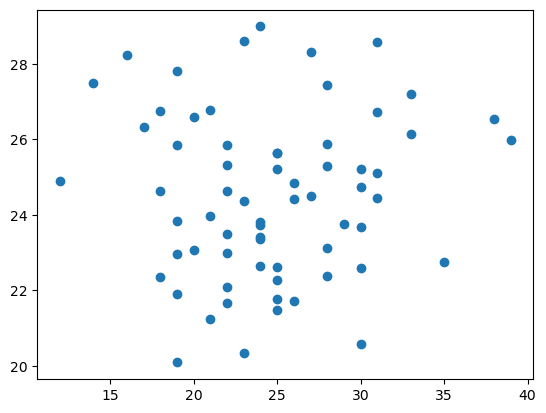

In [32]:
plt.scatter(urban_ride_count,urban_avg_fare)

In [33]:
#build the scatter plots for urban cities

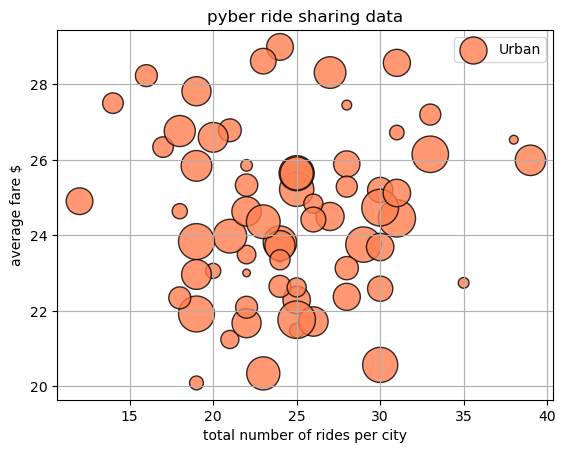

In [160]:
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_avg,c='coral',edgecolor='black',linewidths=1,alpha=.8,label='Urban')
plt.title('pyber ride sharing data')
plt.ylabel('average fare $')
plt.xlabel('total number of rides per city')
plt.grid(True)
plt.legend()
plt.savefig('analysis')
plt.show()

In [37]:
#CREATE THE SUBURBAN CITIES BUBBLE CHART

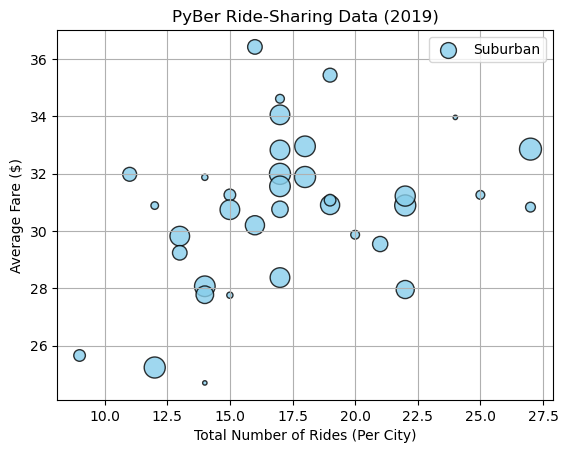

In [161]:
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_avg, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.savefig('analysis')
plt.legend()

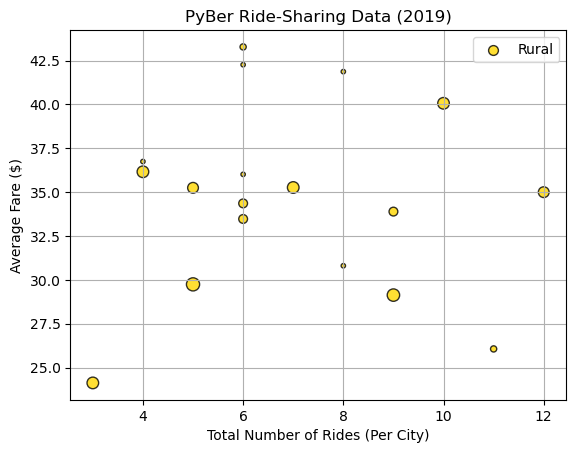

In [162]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.savefig('analysis')
plt.legend()

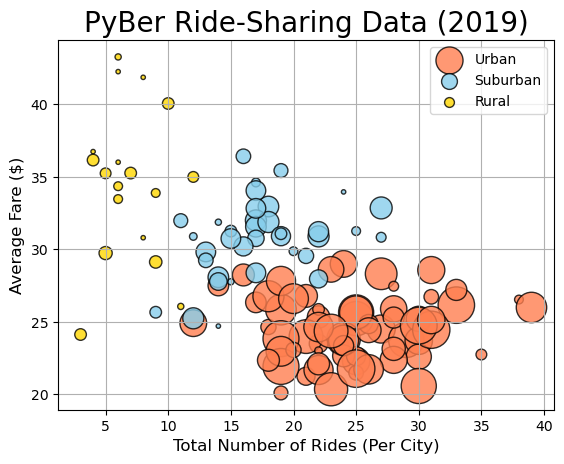

In [164]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_avg, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_avg, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)



# Show the plot
plt.legend()
plt.savefig('analysis/ride_sharing.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: list index out of range

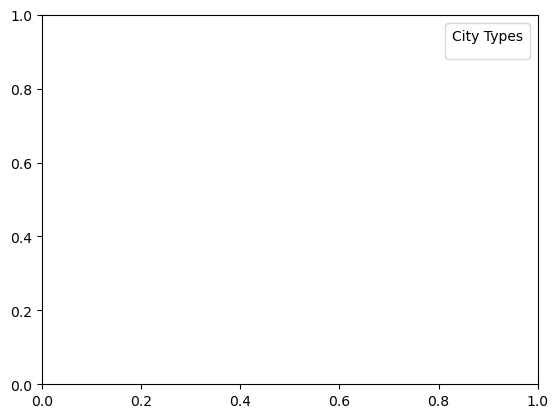

In [62]:
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


In [68]:
urban_cities_df.describe()

fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000

In [71]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [73]:
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [74]:
round(urban_ride_count.median(),2)

24.0

In [76]:
suburban_ride_count.mode()


0    17
Name: ride_id, dtype: int64

In [77]:
import numpy as np
import scipy.stats as sts

In [83]:
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"the mean for the ride counts for urban trip is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

the mean for the ride counts for urban trip is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [84]:
#¡¡¡summary statistics for the fare by city type

In [89]:
urban_fares = urban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [87]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [91]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

The mean fare price for rural trips is $34.62.
The mean fare price for suburban trips is $30.97.


In [ ]:
#¡¡¡summary statistics for the urban drivers by city type

In [136]:
urban_drivers=urban_cities_df['driver_count']
suburban_drivers=suburban_cities_df['driver_count']
rural_drivers=rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [94]:
mean_urban_drivers=np.mean(urban_drivers)
mean_urban_drivers

36.67815384615385

In [95]:
suburban_drivers=suburban_cities_df['driver_count']
mean_suburban_drivers=np.mean(suburban_drivers)
mean_suburban_drivers

13.712

In [110]:
#CREATE BOX AND WHISKER PLOTS
max_ride_count_urban=urban_ride_count.max()
print(max_ride_count_urban)

max_ride_count_rural=rural_ride_count.max()
print(max_ride_count_rural)

max_ride_count_suburban=suburban_ride_count.max()
print(max_ride_count_suburban)


39
12
27


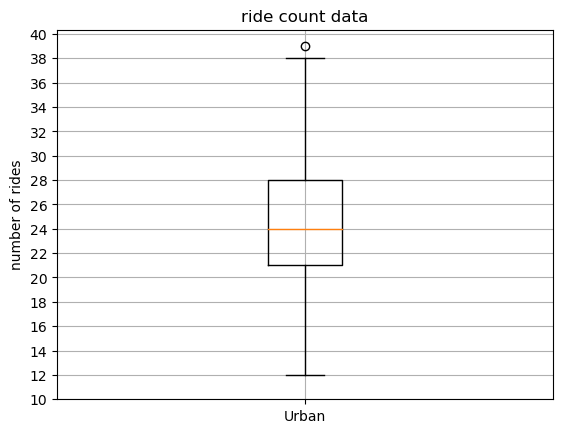

In [124]:
#CREATE A BOX AND WHIKSKER PLOT FOR THR URBAN CITIES RIDE COUNT
x_labels=['Urban']
fig,ax=plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
ax.set_title('ride count data')
ax.set_ylabel('number of rides')
ax.set_yticks(np.arange(10,41,2))
ax.grid()
plt.show()


In [125]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

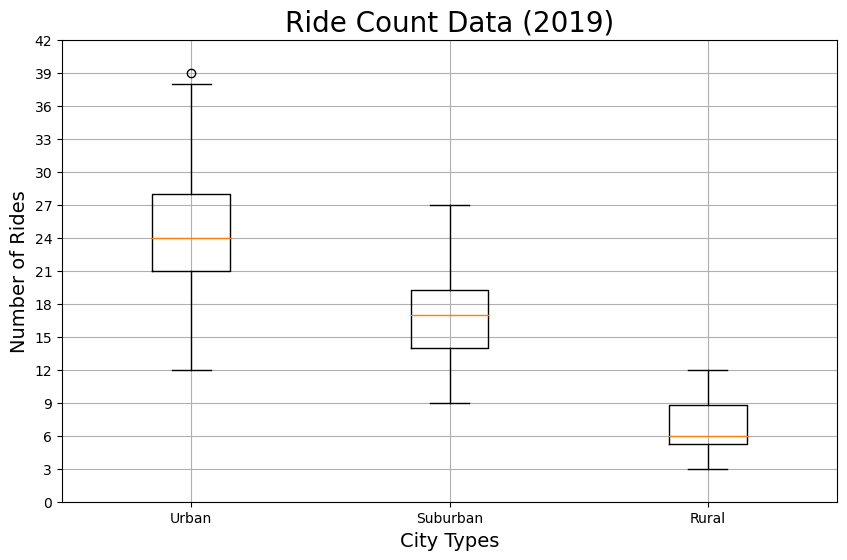

In [165]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig('analysis/ride_count.png')
plt.show()

In [132]:
#get the outlier of the city with the 39 value:

In [134]:
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


In [135]:
#box and whisker plots for ride fare data

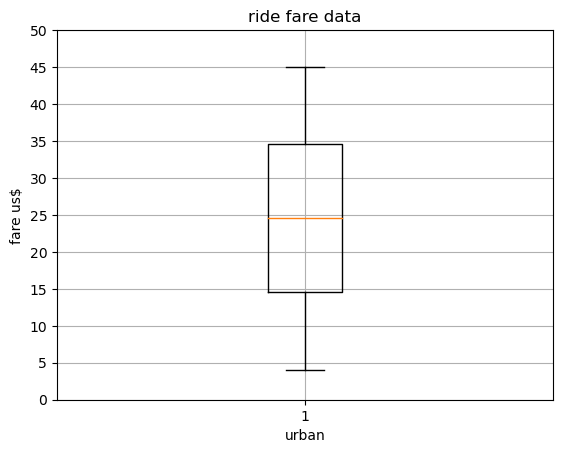

summary statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [142]:
fig,ax=plt.subplots()
ax.boxplot(urban_fares)
ax.set_title('ride fare data')
ax.set_ylabel('fare us$')
ax.set_xlabel('urban')
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print('summary statistics')
urban_fares.describe()

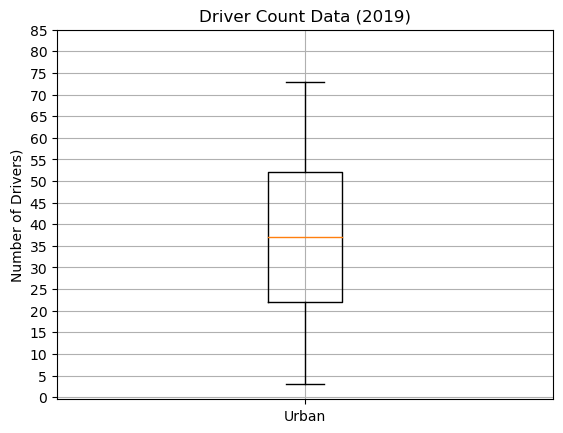

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [145]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


In [146]:
#create a box whisker with all threee city types fare dasta

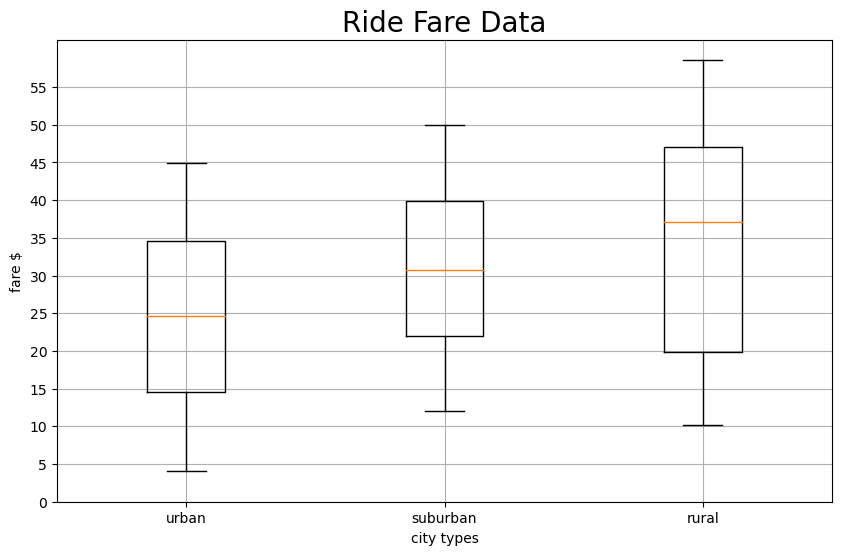

In [166]:
x_labels=['urban','suburban','rural']
fare_avg_data=[urban_fares,suburban_fares,rural_fares]
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data',fontsize=20)
ax.set_xlabel('city types')
ax.set_ylabel('fare $')
ax.boxplot(fare_avg_data,labels=x_labels)
ax.set_yticks(np.arange(0,60,5))
ax.grid()
plt.savefig('analysis/ride_fare.png')
plt.show()


In [152]:
#BOX AND WHSIKER PLOTS FOR DRIVER COUNT DATA

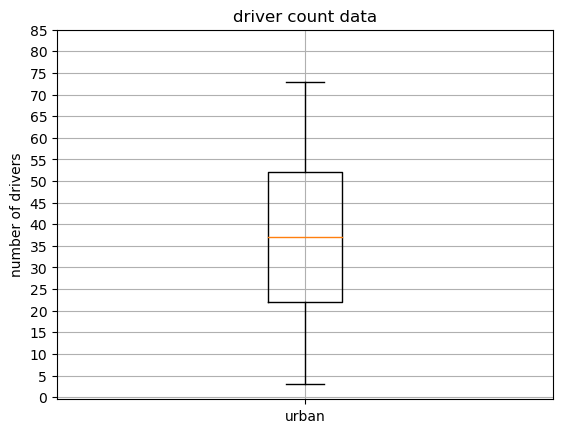

In [157]:
x_labels=['urban']
fig,ax=plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
ax.set_title('driver count data')
ax.set_ylabel('number of drivers')
ax.set_yticks(np.arange(0,90,5))
ax.grid()
plt.show()

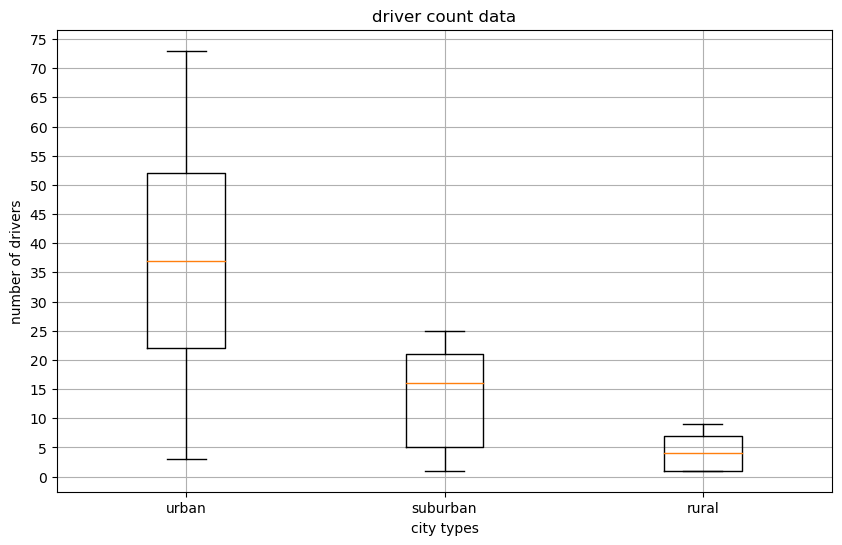

In [167]:
x_labels=['urban','suburban','rural']
driver_count_data=[urban_drivers,suburban_drivers,rural_drivers]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data,labels=x_labels)
ax.set_title('driver count data')
ax.set_xlabel('city types')
ax.set_ylabel('number of drivers')
ax.set_yticks(np.arange(0,80,5))
ax.grid()
plt.savefig('analysis/driver_count.png')
plt.show()